# Mean and Std line plot about feature selection ratio

### Config

In [ ]:
EXPERIMENT_PATH = "../experiments/select_ratio"

# DATASETS = ["Children", "Computers", "Fitness", "History", "Photo", "amazon-ratings", "minesweeper", "questions", "roman-empire", "tolokers"]
# DATASETS_SHOW_NAME = ["Children", "Comp.", "Fitness", "History", "Photo", "Amazon.", "Mines.", "Questions", "Roman.", "Tolokers"]
DATASETS = ["Children", "Computers", "roman-empire", "tolokers"]
DATASETS_SHOW_NAME = ["Children", "Comp.", "Roman.", "Tolokers"]
DATASETS = ["Fitness", "History", "Photo", "amazon-ratings", "minesweeper", "questions"]
DATASETS_SHOW_NAME = ["Fitness", "History", "Photo", "Amazon.", "Mines.", "Questions"]

MLP_LAYER = 2 # [1, 2, 3]
# RATIO = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
RATIO = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

MODEL = "GCN-MLP" # ["GCN-MLP", "MLP-GCN", "GAT-MLP", "SAGE-MLP", "GT-MLP" "SGC-MLP"]
NSF = ["mi_agg"]
FNF_NAME = ["z-norm"]
FNF = [1]

### Read Data

#### Radio

In [ ]:
import yaml
import numpy as np
import os
means_groups_val = []
stds_groups_val = []
means_groups_test = []
stds_groups_test = []

figure_names = []
# if MODEL == "GCN-MLP":
for i, dataset in enumerate(DATASETS):
    print(f"Dataset: {dataset}")
    for fnf in FNF:
        for nsf in NSF:
            means_group_val = []
            means_group_test = []
            stds_group_val = []
            stds_group_test = []
                
            for ratio in RATIO:
                file_name = f'{EXPERIMENT_PATH}/{dataset}/{MODEL}_l2_l{MLP_LAYER}_{ratio:02}_{nsf}_0{fnf}/metrics.yaml'
                if not os.path.exists(file_name):
                    means_group_val.append(0)
                    means_group_test.append(0)
                    stds_group_val.append(0)
                    stds_group_test.append(0)
                    continue
                with open(file_name, 'r') as f:
                    ratio_data = yaml.safe_load(f)
                if "val accuracy mean" in ratio_data:
                    means_group_val.append(ratio_data["val accuracy mean"])
                    means_group_test.append(ratio_data["test accuracy mean"])
                    stds_group_val.append(ratio_data["val accuracy std"])
                    stds_group_test.append(ratio_data["test accuracy std"])
                else:
                    means_group_val.append(ratio_data["val ROC AUC mean"])
                    means_group_test.append(ratio_data["test ROC AUC mean"])
                    stds_group_val.append(ratio_data["val ROC AUC std"])
                    stds_group_test.append(ratio_data["test ROC AUC std"])
            means_groups_val.append(means_group_val)
            means_groups_test.append(means_group_test)
            stds_groups_val.append(stds_group_val)
            stds_groups_test.append(stds_group_test)
            figure_names.append(f'{DATASETS_SHOW_NAME[i]}')

Dataset: Fitness
Dataset: History
Dataset: Photo
Dataset: amazon-ratings
Dataset: minesweeper
Dataset: questions


### Draw Figure

#### Ratio

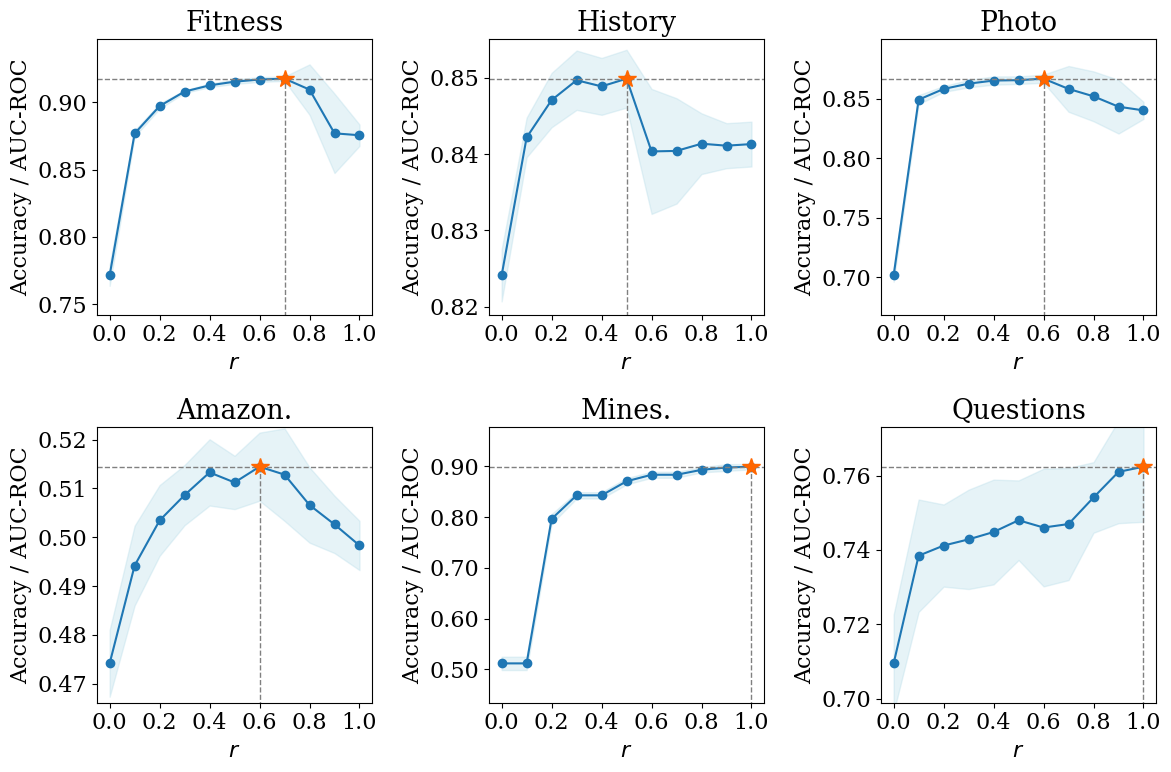

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# make all fonts larger
# plt.rcParams.update({'font.size': 16, 'font.weight': 'normal'})
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['DejaVu Serif'],
    'font.size': 16,
    'font.weight': 'normal'
})

# supose RATIO, means_groups_test, stds_groups_test, DATASETS, figure_names are defined
x = np.arange(RATIO[0], RATIO[-1] + 0.1, 0.1)
figure_total_number = len(means_groups_test)
figure_per_row = len(DATASETS) // 2  # dataset number = 5
fig, axs = plt.subplots(figure_total_number // figure_per_row, figure_per_row, figsize=(4 * figure_per_row, 4 * figure_total_number // figure_per_row))

for i in range(len(means_groups_test)):
    row = i // figure_per_row
    col = i % figure_per_row

    # draw mean line with error bars
    axs[row, col].errorbar(x, means_groups_test[i], fmt='-o', capsize=5, capthick=2, label='mean', zorder=1)
    axs[row, col].fill_between(x, np.array(means_groups_test[i]) - np.array(stds_groups_test[i]),
                               np.array(means_groups_test[i]) + np.array(stds_groups_test[i]),
                               color='lightblue', alpha=0.3, label='std')
    
    
    # mark max value
    max_value = max(means_groups_test[i])
    min_value = min(means_groups_test[i])
    max_index = np.argmax(means_groups_test[i])
    axs[row, col].set_ylim(min_value - 0.2 * (max_value - min_value), max_value + 0.2 * (max_value - min_value))
    
    # add horizontal and vertical dashed lines for max value
    axs[row, col].axhline(y=max_value, color='gray', linestyle='--', linewidth=1)
    axs[row, col].plot([x[max_index],x[max_index]], [0,max_value], color='gray', linestyle='--', linewidth=1)
    
    # annotate max value point with a red star
    axs[row, col].plot(x[max_index], max_value, color='#FF6600', marker='*', markersize=13, zorder=2)

    axs[row, col].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

    # set titles and axis labels
    axs[row, col].set_title(figure_names[i])
    axs[row, col].set_xlabel('$r$')
    axs[row, col].set_ylabel('Accuracy / AUC-ROC')

# adjust spacing between subplots
plt.subplots_adjust(hspace=.3, wspace=.3)
plt.tight_layout()
plt.savefig('../figure/apd_ratio_curve.pdf', bbox_inches='tight')
plt.show()

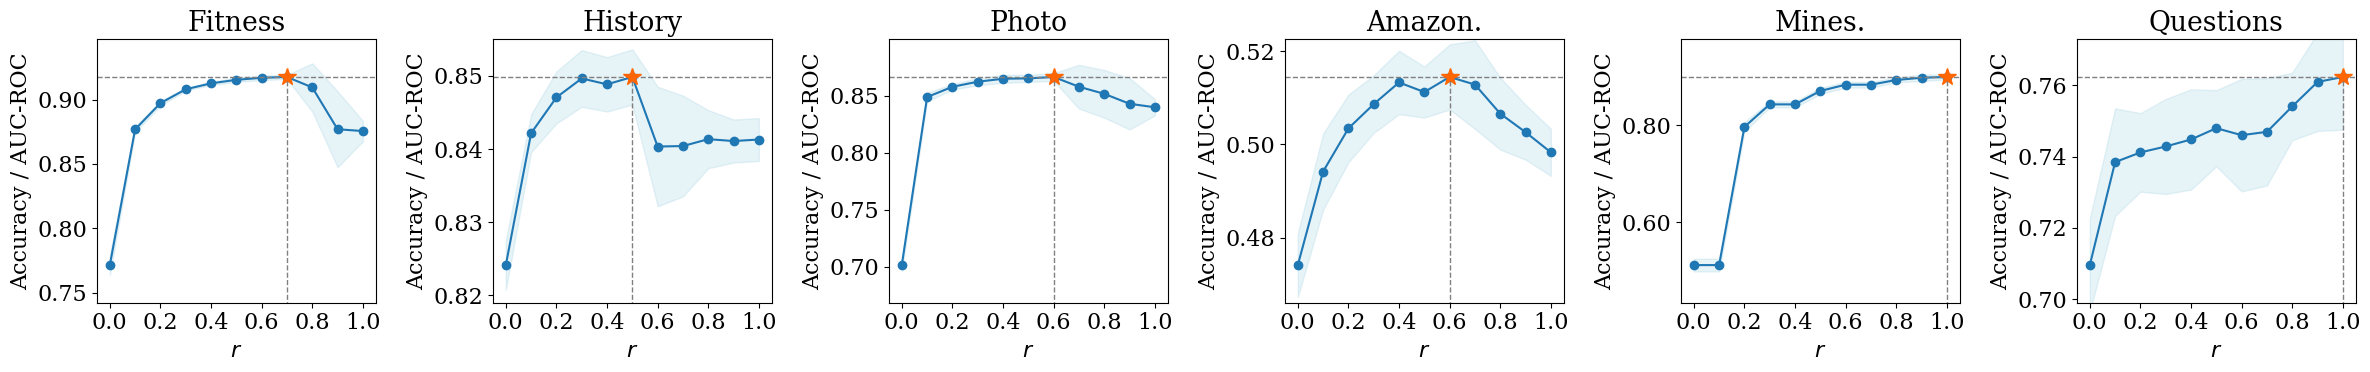

In [ ]:
# draw in a single row
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['DejaVu Serif'],
    'font.size': 16,
    'font.weight': 'normal'
})

x = np.arange(RATIO[0], RATIO[-1] + 0.1, 0.1)
figure_total_number = len(means_groups_test)
# figure_total_number = len(means_groups_val)
figure_per_row = len(DATASETS) # dataset number = 5
fig, axs = plt.subplots(1, figure_per_row, figsize=(4 * figure_per_row, 4))
for i in range(len(means_groups_test)):
    row = 0
    col = i
    # plot mean line with error bars
    axs[col].errorbar(x, means_groups_test[i], fmt='-o', capsize=5, capthick=2, label='mean', zorder=1)
    axs[col].fill_between(x, np.array(means_groups_test[i]) - np.array(stds_groups_test[i]),
                               np.array(means_groups_test[i]) + np.array(stds_groups_test[i]),
                               color='lightblue', alpha=0.3, label='std')
    
    
    # mark max value
    max_value = max(means_groups_test[i])
    min_value = min(means_groups_test[i])
    max_index = np.argmax(means_groups_test[i])
    axs[col].set_ylim(min_value - 0.2 * (max_value - min_value), max_value + 0.2 * (max_value - min_value))
    
    # add horizontal and vertical dashed lines for max value
    axs[col].axhline(y=max_value, color='gray', linestyle='--', linewidth=1)

    # the vertical dashed line should end at max_value
    axs[col].plot([x[max_index],x[max_index]], [0,max_value], color='gray', linestyle='--', linewidth=1)
    
    # annotate max value point
    axs[col].plot(x[max_index], max_value, color='#FF6500', marker='*', markersize=13, zorder=2)

    axs[col].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

    # set titles and axis labels
    axs[col].set_title(figure_names[i])
    axs[col].set_xlabel('$r$')
    axs[col].set_ylabel('Accuracy / AUC-ROC')

# adjust spacing between subplots
plt.subplots_adjust(hspace=.3, wspace=.3)
plt.tight_layout()
plt.savefig('../figure/ratio_curve.pdf', bbox_inches='tight')
plt.show()